In [30]:
using PyPlot

In [ ]:
name = "fk"

if ispath(name) == true
    rm(name, recursive=true)
end
mkdir(name)

if isfile("$(name).zip") == true
    rm("$(name).zip")
end

### Homogene Transformationsmatrizen

In [20]:
RZ(θ) = [
    [cos(θ) -sin(θ) 0 0];
    [sin(θ) cos(θ) 0 0];
    [0 0 1 0];
    [0 0 0 1]
]

RX(α) = [
    [1 0 0 0]
    [0 cos(α) -sin(α) 0];
    [0 sin(α)  cos(α) 0];
    [0 0 0 1]
]

TZ(d) = [
    [1 0 0 0];
    [0 1 0 0];
    [0 0 1 d];
    [0 0 0 1]
]

TX(a) = [
    [1 0 0 a];
    [0 1 0 0];
    [0 0 1 0];
    [0 0 0 1]
]

A(θ, d, α, a) = RZ(θ) * TZ(d) * TX(a) * RX(α)

A (generic function with 1 method)

In [21]:
A(π, 1, -π, 2)

4x4 Array{Float64,2}:
 -1.0           1.22465e-16  -1.49976e-32  -2.0        
  1.22465e-16   1.0          -1.22465e-16   2.44929e-16
  0.0          -1.22465e-16  -1.0           1.0        
  0.0           0.0           0.0           1.0        

### Definition Roboter

In [22]:
A1(θ) = A(θ,0,0,2)
A2(θ) = A(θ,0,0,0.75)
A3(θ) = A(θ,0,0,0.5)

A3 (generic function with 1 method)

### Vorwärtskinematik

In [23]:
function ForwardKinematics(q)
    base = [0;0;0;1]
    
    θ1 = q[1]
    θ2 = q[2]
    θ3 = q[3]
    
    p1 = A1(θ1) * base
    p2 = A1(θ1) * A2(θ2) * base
    p3 = A1(θ1) * A2(θ2) * A3(θ3) * base
    
    [p1 p2 p3]
end

ForwardKinematics (generic function with 2 methods)

In [24]:
ForwardKinematics([0,1,3])

4x3 Array{Float64,2}:
 2.0  2.40523   2.0784  
 0.0  0.631103  0.252702
 0.0  0.0       0.0     
 1.0  1.0       1.0     

### Plot Funktionen

In [25]:
function PlotRoboter(coords)
    fig = figure(figsize=(8,5))
    xlim(-4,4)
    ylim(-1,4)
    xticks([])
    yticks([])
    
    plot([0,           coords[1,1]], [0,           coords[2,1]], color="red",   lw = 5.0)
    plot([coords[1,1], coords[1,2]], [coords[2,1], coords[2,2]], color="green", lw = 5.0)
    plot([coords[1,2], coords[1,3]], [coords[2,2], coords[2,3]], color="blue",  lw = 5.0)
    fig
    
end

PlotRoboter (generic function with 2 methods)

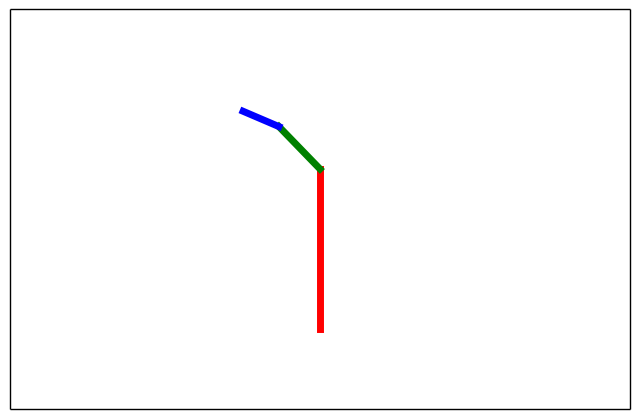

In [26]:
coords = ForwardKinematics([π/2,π/4,π/8])
PlotRoboter(coords)

In [31]:
ioff()
θ1 = collect(0:0.01:π)
θ2 = collect(0:0.02:2π)
θ3 = collect(0:0.04:4π)

for i = 1:length(θ1)
    coords = ForwardKinematics([θ1[i], θ2[i], θ3[i]])
    fig = PlotRoboter(coords)
    savefig("$name/robot_$(i-1).png", bbox_inches="tight")
    close(fig)
end

ion()

In [36]:
run(`zip -r $name $name`)
rm(name, recursive=true)

updating: fk/ (stored 0%)
updating: fk/robot_0.png (deflated 76%)
updating: fk/robot_1.png (deflated 61%)
updating: fk/robot_10.png (deflated 35%)
updating: fk/robot_100.png (deflated 22%)
updating: fk/robot_101.png (deflated 22%)
updating: fk/robot_102.png (deflated 22%)
updating: fk/robot_103.png (deflated 25%)
updating: fk/robot_104.png (deflated 24%)
updating: fk/robot_105.png (deflated 28%)
updating: fk/robot_106.png (deflated 26%)
updating: fk/robot_107.png (deflated 24%)
updating: fk/robot_108.png (deflated 24%)
updating: fk/robot_109.png (deflated 25%)
updating: fk/robot_11.png (deflated 37%)
updating: fk/robot_110.png (deflated 25%)
updating: fk/robot_111.png (deflated 25%)
updating: fk/robot_112.png (deflated 26%)
updating: fk/robot_113.png (deflated 26%)
updating: fk/robot_114.png (deflated 24%)
updating: fk/robot_115.png (deflated 23%)
updating: fk/robot_116.png (deflated 23%)
updating: fk/robot_117.png (deflated 23%)
updating: fk/robot_118.png (deflated 24%)
updating: fk/r